In [1]:
import pandas as pd
import datetime
import quandl

In [2]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [3]:
amzn = quandl.get('WIKI/AMZN',start_date='2008-01-01',end_date='2018-01-01')

In [4]:
amzn = amzn[['Adj. Close']]

In [5]:
amzn.head()

,Adj. Close
Date,
2008-01-02,96.25
2008-01-03,95.21
2008-01-04,88.79
2008-01-07,88.82
2008-01-08,87.88


In [6]:
amzn['short_mean']=amzn['Adj. Close'].rolling(20).mean()
amzn['long_mean']=amzn['Adj. Close'].rolling(40).mean()


In [7]:
amzn.head(21)

,Adj. Close,short_mean,long_mean
Date,,,
2008-01-02,96.25,NaN,NaN
2008-01-03,95.21,NaN,NaN
2008-01-04,88.79,NaN,NaN
2008-01-07,88.82,NaN,NaN
2008-01-08,87.88,NaN,NaN
2008-01-09,85.22,NaN,NaN
2008-01-10,84.26,NaN,NaN
2008-01-11,81.08,NaN,NaN
2008-01-14,82.87,NaN,NaN


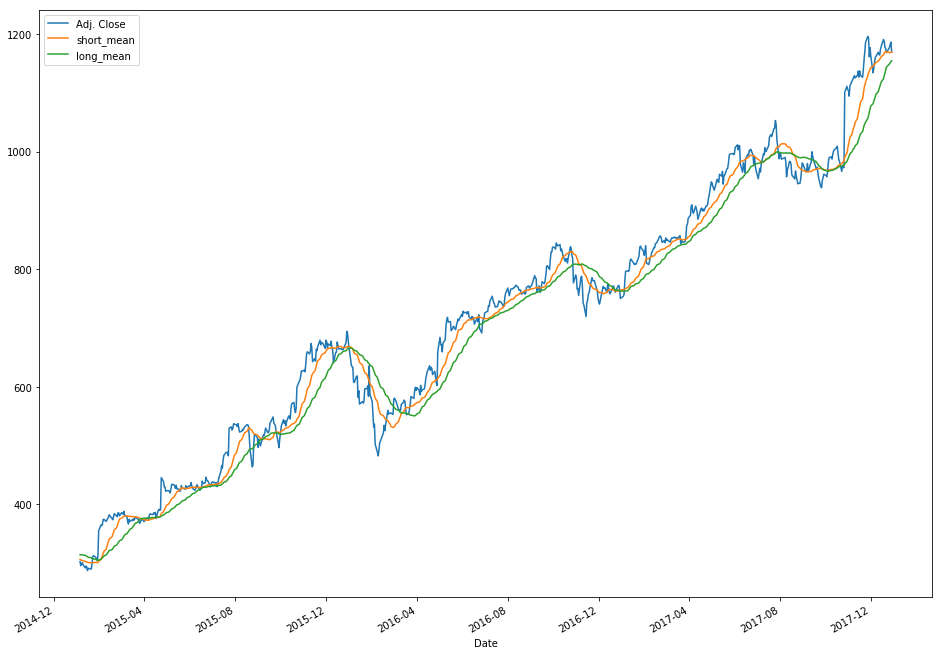

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

amzn.loc['2015-01-03':].plot(figsize=(16,12))
plt.show()

In [9]:
amzn['order']=0


In [10]:
import numpy as np
amzn.head()

,Adj. Close,short_mean,long_mean,order
Date,,,,
2008-01-02,96.25,NaN,NaN,0
2008-01-03,95.21,NaN,NaN,0
2008-01-04,88.79,NaN,NaN,0
2008-01-07,88.82,NaN,NaN,0
2008-01-08,87.88,NaN,NaN,0


In [11]:
# STRATEGI take the points where short mean is bigger than long mean to buy the stock
y = np.where(amzn.short_mean> amzn.long_mean, 1.0, 0)

In [12]:
amzn.loc[:,'order'] = y

In [13]:
amzn.order.value_counts()

1.0    1652
0.0     864
Name: order, dtype: int64

In [14]:
# Returns
amzn['ret1'] = amzn['Adj. Close'].pct_change()

In [15]:
amzn['ret1']=amzn['ret1']*amzn['order']

In [16]:
amzn['cumreturns']=(1+amzn.ret1).cumprod()


In [17]:
amzn.tail()

,Adj. Close,short_mean,long_mean,order,ret1,cumreturns
Date,,,,,,
2017-12-22,1168.36,1169.4845,1143.87100,1.0,-0.005448,6.777036
2017-12-26,1176.76,1168.5310,1148.97925,1.0,0.007190,6.825760
2017-12-27,1182.26,1167.9640,1151.01200,1.0,0.004674,6.857662
2017-12-28,1186.10,1169.2055,1152.89325,1.0,0.003248,6.879936
2017-12-29,1169.47,1168.8415,1154.49800,1.0,-0.014021,6.783474


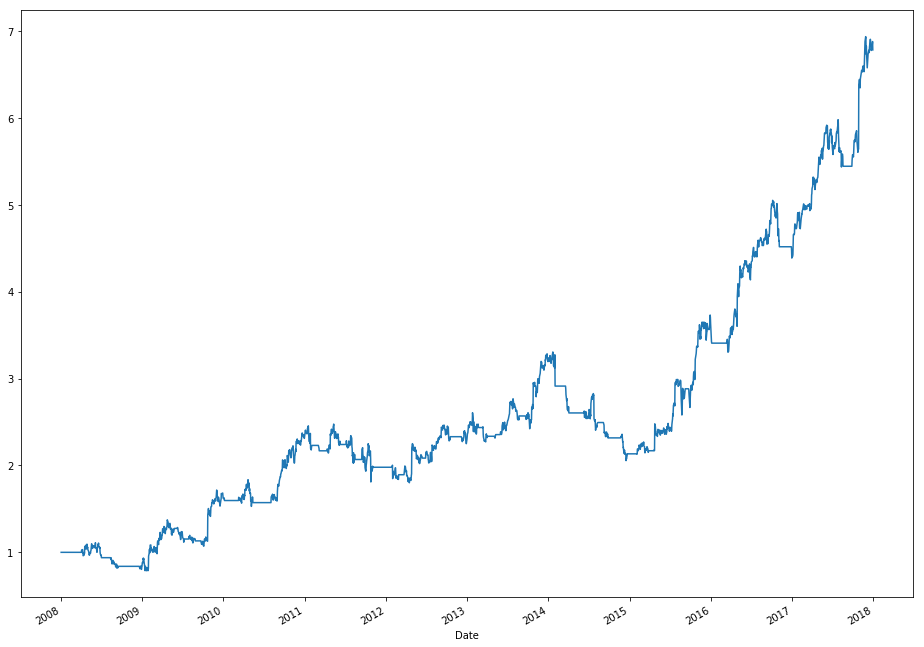

In [18]:
plt.figure(figsize=(16,12))
amzn.cumreturns.plot()
